## **CIFAR 10**
A dataset of 70,000 images (60,000 training set and 10,000 test set) of various objects belonging to 10 different classes.
The shape of each image is 32 x 32 x 3 ( width x height x color_scheme ).

The following code builds a image classifier for the dataset using the ANN architecture.



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
# Importing the dataset
from tensorflow.keras.datasets import cifar10

In [10]:
# Splitting the training set
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
class_names = ['Airplne','Automobile','Bird','Cat','Deer','Dog','Frog',
               'Horse','Ship','Truck']

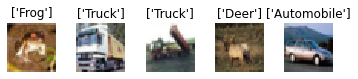

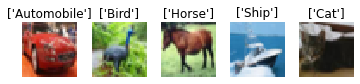

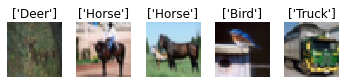

In [12]:
# Showing some sample images from the dataset
n_rows = 3
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows,n_cols,index+1)
    plt.imshow(x_train[index],cmap='binary',interpolation='nearest')
    plt.axis('off')
    plt.title(np.array(class_names)[y_train[index]], fontsize=12)
  plt.subplots_adjust(wspace=0.2,hspace=0.5)
  plt.show()

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_train.max()

255

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.regularizers import l2
import keras

In [0]:
# Creating the model
model = Sequential()
model.add(Flatten(input_shape=[32,32,3]))
model.add(BatchNormalization())
model.add(Dense(310,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(260,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Creating the instance of Early Stopping
early_stop = EarlyStopping(monitor='val_loss',patience=4)


In [101]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 3072)              12288     
_________________________________________________________________
dense_70 (Dense)             (None, 310)               952630    
_________________________________________________________________
dropout_19 (Dropout)         (None, 310)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 260)               80860     
_________________________________________________________________
dropout_20 (Dropout)         (None, 260)               0         
_________________________________________________________________
dense_72 (Dense)             (None, 10)              

In [102]:
# Fitting the model on the training
model.fit(x=x_train,y=y_train,epochs=50,validation_data=(x_test,y_test),
          callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 4.2333 - accuracy: 0.3200 - val_loss: 2.0681 - val_accuracy: 0.3577
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0995 - accuracy: 0.3364 - val_loss: 2.0217 - val_accuracy: 0.3575
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0885 - accuracy: 0.3368 - val_loss: 2.0105 - val_accuracy: 0.3733
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0640 - accuracy: 0.3457 - val_loss: 1.9773 - val_accuracy: 0.3700
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0212 - accuracy: 0.3498 - val_loss: 1.9224 - val_accuracy: 0.3839
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9798 - accuracy: 0.3569 - val_loss: 1.8761 - val_accuracy: 0.3915
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9499 - accuracy: 0.3596 - val_loss: 1.8386 - val_accuracy:

In [105]:
# Further training the model since there was no overfitting 
model.fit(x=x_train,y=y_train,epochs=50,validation_data=(x_test,y_test),
          callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8342 - accuracy: 0.3959 - val_loss: 1.7348 - val_accuracy: 0.4366
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8285 - accuracy: 0.3983 - val_loss: 1.7264 - val_accuracy: 0.4372
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8210 - accuracy: 0.3975 - val_loss: 1.7223 - val_accuracy: 0.4423
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8265 - accuracy: 0.3968 - val_loss: 1.7221 - val_accuracy: 0.4334
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8207 - accuracy: 0.4001 - val_loss: 1.7167 - val_accuracy: 0.4382
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8118 - accuracy: 0.4045 - val_loss: 1.7149 - val_accuracy: 0.4387
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8152 - accuracy: 0.4011 - val_loss: 1.7070 - val_accuracy:

In [0]:
# Saving the results of the training
resutls = pd.DataFrame(model.history.history)

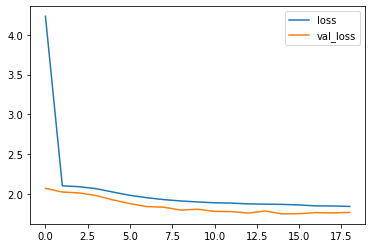

In [107]:
resutls[['loss','val_loss']].plot()

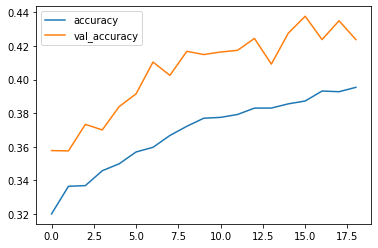

In [106]:
resutls[['accuracy','val_accuracy']].plot()

In [108]:
# Evaluating the model on the test set
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6984 - accuracy: 0.4466


[1.698370099067688, 0.4465999901294708]

In [117]:
predictions = model.predict_classes(x_test)
true_class = list(y_test)
predicted_class = list(predictions)
r = pd.DataFrame({'True Class':true_class,'Predicted Class':predicted_class})
r.to_csv('./True_VS_Predicted_CIFAR_10.csv',index=False)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [118]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,predictions)
con_mat

array([[464,  37,  26,  45,  48,  10,  18,  55, 252,  45],
       [ 41, 457,  10,  22,  19,  18,  28,  45, 164, 196],
       [138,  28, 141,  66, 293,  71, 112,  87,  46,  18],
       [ 23,  23,  63, 162, 131, 254, 150, 108,  49,  37],
       [ 47,  14,  69,  49, 485,  46, 123, 118,  36,  13],
       [ 19,  18,  90, 115,  85, 373,  99, 100,  81,  20],
       [  8,  18,  18,  99, 292,  76, 437,  27,  15,  10],
       [ 39,  22,  37,  46, 131,  87,  52, 473,  56,  57],
       [122,  52,   4,  21,  19,  22,  13,  21, 662,  64],
       [ 41, 153,   5,  47,  25,  16,  35,  68, 168, 442]])

In [0]:
# Saving the model
model.save('CIFAR_10_ANN_Classifier.h5')